In [ ]:
import pandas as pd
import category_encoders as ce
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
import seaborn as sns

# # About clustering

1) https://medium.com/turing-talks/clustering-conceitos-básicos-principais-algoritmos-e-aplicação-ace572a062a9

2) https://blog.somostera.com/data-science/clusterização-de-dados

3) https://www.sciencedirect.com/science/article/pii/S0167865509002323

# Pré-processamento

Pre-processing. This may involve:

1) Removing outliers: outliers are observations that deviate significantly from the other observations in the data set (either by being a much larger or smaller value than the others) and can distort the clustering results by pulling the center of a cluster towards them or creating additional unnecessary clusters;

2) Normalization of variables: the normalization (or standardization) of variables is essential, especially when the variables are on different scales or units;

3) Category coding: for clustering methods that operate in metric/numerical space, such as K-Means, it is necessary to convert categorical variables into numerical formats through techniques such as One-Hot or Binary Encoding;

4) Handling null values: null values can distort the clustering analysis if they are not handled properly. Common strategies for dealing with null values include imputation, where null values are replaced by an estimated value based on other observations (mean, median or a value predicted by a model), and deletion, where rows or columns with null values are removed;

5) Dimensionality reduction: in data sets with high dimensionality (many columns), dimensionality reduction techniques such as PCA (Principal Component Analysis) or t-SNE can be applied to simplify the data without losing essential information. This can improve computational efficiency and the quality of clusters, making it easier to identify structures in the data;

In [6]:
# Read the archive
nomeDoArquivo = "2014 a 2018-1"
data = pd.read_excel(nomeDoArquivo + ".xlsx")
backup = data.copy()

# Print the name of the columns
data.columns

Index(['Data de cadastro', 'UF', 'Munícipio', 'Violação', 'Residência',
       'Filhos violência', 'Relação vítima-suspeito',
       'Comportamento efeito agressor', 'Tipo de violência',
       'Violência familiar', 'Denunciante', 'Frequência',
       'Drogas Álcool Suspeito', 'Filhos vítima',
       'Dependência Financeira da Vítima', 'Tempo de violência contexto',
       'Coabitação contexto', 'Risco contexto', 'Sexo da vítima',
       'Sexo do suspeito', 'Raça\Cor da vítima', 'Raça\Cor do suspeito',
       'Faixa etária da vítima', 'Faixa etária do suspeito',
       'Grau de instrução da vítima', 'Grau de instrução do suspeito'],
      dtype='object')

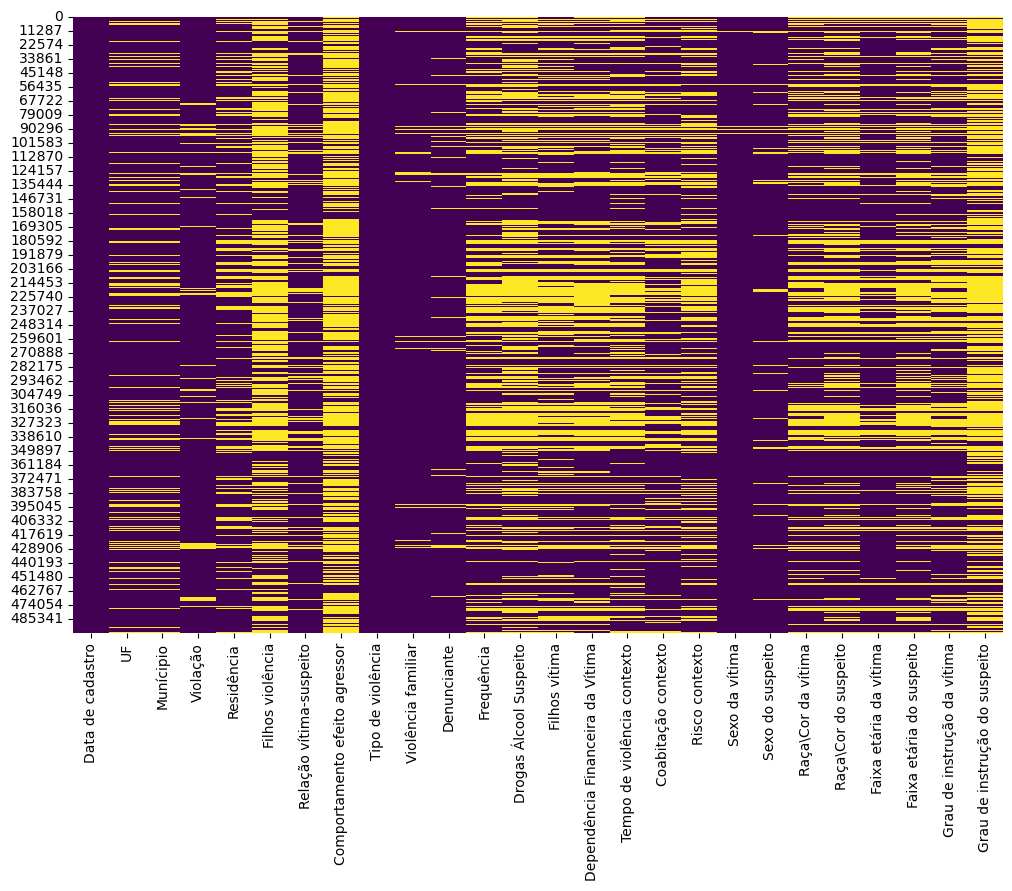

In [7]:
# Visualization of null values with a heatmap
plt.figure(figsize=(12, 8)) 
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

In [ ]:
def FiltraTabela(df, nullValuesPercentAcceptable, uniqueValuesCountAcceptable): 
    # Define a new dataset with the columns that have a number of null values and unique occurrences acceptable for coding,
    # thus reducing dimensionality
    selectedColumns = []

    # Standardization of missing values. Sets missing values to “NULL”
    df = df.applymap(lambda x: "NULO" if pd.isnull(x) else x)

    # For each column of the dataset
    for column in df:
        # Calculation of the percentage of null values
        nullValuesPercent = (df[column].value_counts().get('NULO', 0) * 100) / len(df)
 
        # Calculating the number of unique occurrences
        uniqueValuesCount = df[column].nunique()

        # Prints for verification
        print(f'Coluna: {column}')
        print(f'Porcentagem de Valores Nulos: {nullValuesPercent:.2f}%')
        print(f'Número de Valores Únicos: {uniqueValuesCount}')
        
        # Condition for composing the new dataset
        if nullValuesPercent < nullValuesPercentAcceptable and uniqueValuesCount < uniqueValuesCountAcceptable:
            selectedColumns.append(column)
            print("Inserido\n")
        else:
            print("Não Inserido\n")

    # Creates a copy with the previously defined columns.
    dfFiltered = df[selectedColumns].copy()

    # Sets all dataset columns to string
    dfFiltered = dfFiltered.astype(str)

    return dfFiltered

# Choosing the Number of Clusters and Initialization Algorithms 

Determining the appropriate number of clusters is fundamental when preparing models, especially for those that use clustering methods that require the definition of a number beforehand, such as K-Modes and K-Means. 

The number of clusters can, in some cases, be easily determined from the context from which the data was taken. For sales data from a store, for example, the number of clusters could be related to the number of products the store sells, so that each cluster represents the profile of the customer who consumes it. 

If not, methods such as the Elbow Method, the Silhouette Score or the Davies-Bouldin Index can help estimate an optimal number of clusters based on the internal cohesion of the clusters and the separation between them.

Here, the Elbow Method will be used to find an optimal K (number of clusters) for our data set, with different algorithms chosen for the initial reference values (modes) of each cluster.

All runs will be made 5 times (n_init = 5) to ensure that there are no trends in the generation of random numbers.

# Clustering with K-Modes

1) https://pypi.org/project/kmodes/ 

2) https://harikabonthu96.medium.com/kmodes-clustering-2286a9bfdcfb

3) https://awari.com.br/aprenda-a-utilizar-o-k-modes-com-python-para-analise-de-dados/?utm_source=blog&utm_campaign=projeto+blog&utm_medium=Aprenda%20a%20Utilizar%20o%20K-Modes%20com%20Python%20para%20Análise%20de%20Dados

4) https://link.springer.com/article/10.1007/s00357-001-0004-3

In [ ]:
dataFiltered = FiltraTabela(data, 50, 100)

# Definition of how many clusters will be tested.
numbersOfClustersKModes = range(1,5)

# Vectors to store the “costs” (quantitative measure of how well the clusters were formed in terms of internal homogeneity) for K-Modes
costRandom = []
costCao = []
costHuang = []

In [ ]:
# Random choice of modes (init = “random”).
for clustersNumber in list(numbersOfClustersKModes):
    kmode = KModes(n_clusters=clustersNumber, init = "random", n_init = 5, verbose=1, n_jobs = -1)
    kmode.fit_predict(dataFiltered)
    costRandom.append(kmode.cost_)

In [ ]:
# Modes chosen based on Cao's algorithm (init = “cao”).
for clustersNumber in list(numbersOfClustersKModes):
    kmode = KModes(n_clusters=clustersNumber, init = "cao", n_init = 5, verbose=1, n_jobs = -1)
    kmode.fit_predict(dataFiltered)
    costCao.append(kmode.cost_)

In [ ]:
# Modes chosen based on Huang's algorithm (init = “huang”).
for clustersNumber in list(numbersOfClustersKModes):
    kmode = KModes(n_clusters=clustersNumber, init = "huang", n_init = 5, verbose=1, n_jobs = -1)
    kmode.fit_predict(dataFiltered)
    costHuang.append(kmode.cost_)

In [ ]:
costsKModes = pd.DataFrame({
    "Random" : costRandom,
    "Cao" : costCao,
    "Huang" : costHuang,
    "Número de Clusters" : numbersOfClustersKModes
})

# Visualization of costs
fig = px.line(
    costsKModes, 
    x = "Número de Clusters", 
    y = ["Random", "Cao", "Huang"], 
    title = (
        f"Método do Cotovelo para o KModes com até {len(numbersOfClustersKModes)} clusters<br>"
        f"(dataset: {nomeDoArquivo}, "
        f"porcentagem de valores nulos aceito: {nullValuesPercentAcceptable}%, "
        f"quantia de valores únicos por coluna aceito: {uniqueValuesCountAcceptable})"
    )
)

fig.update_layout(
    xaxis_title="Número de Clusters",
    yaxis_title="Custo",
    legend_title="Método de Inicialização"
)

fig.show()

# Clustering with K-Means

## Test 1 

Test to see if the type of conditioning (Binary and One-Hot) influences the clustering result.

**Conclusion**: No influence.


### Test 1.1: 

**Coding**: binary

**Percentage of unique values accepted**: -
         
**Number of unique occurrences accepted**: - 

In [ ]:
# Creates the dataset with Binary Coding
codificador = ce.BinaryEncoder(cols=data.columns)
dataBinaryTest1_1 = codificador.fit_transform(data)

# Definition of how many clusters will be tested.
numbersOfClustersKMeansTest1_1 = range(1, 15)

# Vectors to store the “costs” (quantitative measure of how well the clusters were formed in terms of internal homogeneity) for K-Means
inertiaRandomTest1_1 = []
inertiaKMeansTest1_1 = []

In [ ]:
# Calculating the inertia for 'random' initialization
for clustersNumber in numbersOfClustersKMeansTest1_1:
    kmeans_random = KMeans(n_clusters=clustersNumber, init='random', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_random.fit(dataBinaryTest1_1)
    inertiaRandomTest1_1.append(kmeans_random.inertia_)

In [ ]:
# Calculating inertia for 'k-means++' initialization
for clustersNumber in numbersOfClustersKMeansTest1_1:
    kmeans_kmeans = KMeans(n_clusters=clustersNumber, init='k-means++', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_kmeans.fit(dataBinaryTest1_1)
    inertiaKMeansTest1_1.append(kmeans_kmeans.inertia_)

In [ ]:
inertiasKMeansTest1_1 = pd.DataFrame({
    "Random" : inertiaRandomTest1_1,
    "K-Means++" : inertiaKMeansTest1_1,
    "Número de Clusters" : numbersOfClustersKMeansTest1_1
})

# Visualization of costs
fig = px.line(
    inertiasKMeansTest1_1, 
    x = "Número de Clusters", 
    y = ["Random", "K-Means++"], 
    title = (
        f"Teste 1.1: Método do Cotovelo para o KMeans com até {len(numbersOfClustersKMeansTest1_1)} clusters<br> "
        f"(dataset: {nomeDoArquivo}, codificação: binária, "
        f"porcentagem de valores nulos aceito: 100%, "
        f"quantia de valores únicos por coluna aceito: tudo)"
    )
)

fig.update_layout(
    xaxis_title="Número de Clusters",
    yaxis_title="Inércia",
    legend_title="Método de Inicialização"
)

fig.show()

### Test 1.2: 

**Coding**: binary

**Percentage of unique values accepted**: 50%
         
**Number of unique occurrences accepted**: 500 

In [ ]:
# Creates the filtered dataset and applies Binary Encoding
nullValuesPercentAcceptableTest1_2 = 50
uniqueValuesCountAcceptableTest1_2 = 500
dataFilteredTest1_2 = FiltraTabela(data, nullValuesPercentAcceptableTest1_2, uniqueValuesCountAcceptableTest1_2)
codificador = ce.BinaryEncoder(cols=dataFilteredTest1_2.columns)
dataFilteredBinaryTest1_2 = codificador.fit_transform(dataFilteredTest1_2)

# Definition of how many clusters will be tested.
numbersOfClustersKMeansTest1_2 = range(1, 15)

# Vectors to store the “costs” (quantitative measure of how well the clusters were formed in terms of internal homogeneity) for K-Means
inertiaRandomTest1_2 = []
inertiaKMeansTest1_2 = []

In [ ]:
# Calculating the inertia for 'random' initialization
for clustersNumber in numbersOfClustersKMeansTest1_2:
    kmeans_random = KMeans(n_clusters=clustersNumber, init='random', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_random.fit(dataFilteredBinaryTest1_2)
    inertiaRandomTest1_2.append(kmeans_random.inertia_)

In [ ]:
# Calculating inertia for 'k-means++' initialization
for clustersNumber in numbersOfClustersKMeansTest1_2:
    kmeans_kmeans = KMeans(n_clusters=clustersNumber, init='k-means++', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_kmeans.fit(dataFilteredBinaryTest1_2)
    inertiaKMeansTest1_2.append(kmeans_kmeans.inertia_)

In [ ]:
inertiasKMeansTest1_2 = pd.DataFrame({
    "Random" : inertiaRandomTest1_2,
    "K-Means++" : inertiaKMeansTest1_2,
    "Número de Clusters" : numbersOfClustersKMeansTest1_2
})

# Visualization of costs
fig = px.line(
    inertiasKMeansTest1_2, 
    x = "Número de Clusters", 
    y = ["Random", "K-Means++"], 
    title = (
        f"Teste 1.2: Método do Cotovelo para o KMeans com até {len(numbersOfClustersKMeansTest1_2)} clusters<br> "
        f"(dataset: {nomeDoArquivo}, codificação: binária, "
        f"porcentagem de valores nulos aceito: {nullValuesPercentAcceptableTest1_2}%, "
        f"quantia de valores únicos por coluna aceito: {uniqueValuesCountAcceptableTest1_2})"
    )
)

fig.update_layout(
    xaxis_title="Número de Clusters",
    yaxis_title="Inércia",
    legend_title="Método de Inicialização"
)

fig.show()

### Test 1.3: 

**Coding**: One-Hot

**Percentage of unique values accepted**: 50%
         
**Number of unique occurrences accepted**: 500 

In [ ]:
# Create the filtered dataset and apply One-Hot Encoding
nullValuesPercentAcceptableTest1_3 = 50
uniqueValuesCountAcceptableTest1_3 = 500
dataFilteredTest1_3 = FiltraTabela(data, nullValuesPercentAcceptableTest1_3, uniqueValuesCountAcceptableTest1_3)
dataFilteredOneHotTest1_3 = pd.get_dummies(dataFilteredTest1_3)

# Definition of how many clusters will be tested.
numbersOfClustersKMeansTest1_3 = range(1, 15)
# Vectors to store the “costs” (quantitative measure of how well the clusters were formed in terms of internal homogeneity) for K-Means
inertiaRandomTest1_3 = []
inertiaKMeansTest1_3 = []

In [ ]:
# Calculating the inertia for 'random' initialization
for clustersNumber in numbersOfClustersKMeansTest1_3:
    kmeans_random = KMeans(n_clusters=clustersNumber, init='random', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_random.fit(dataFilteredOneHotTest1_3)
    inertiaRandomTest1_3.append(kmeans_random.inertia_)

In [ ]:
# Calculating inertia for 'k-means++' initialization
for clustersNumber in numbersOfClustersKMeansTest1_3:
    kmeans_kmeans = KMeans(n_clusters=clustersNumber, init='k-means++', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_kmeans.fit(dataFilteredOneHotTest1_3)
    inertiaKMeansTest1_3.append(kmeans_kmeans.inertia_)

In [ ]:
inertiasKMeansTest1_3 = pd.DataFrame({
    "Random" : inertiaRandomTest1_3,
    "K-Means++" : inertiaKMeansTest1_3,
    "Número de Clusters" : numbersOfClustersKMeansTest1_3
})

# Visualization of costs
fig = px.line(
    inertiasKMeansTest1_3, 
    x = "Número de Clusters", 
    y = ["Random", "K-Means++"], 
    title = (
        f"Teste 1.3: Método do Cotovelo para o KMeans com até {len(numbersOfClustersKMeansTest1_3)} clusters<br> "
        f"(dataset: {nomeDoArquivo}, codificação: One-Hot, "
        f"porcentagem de valores nulos aceito: {nullValuesPercentAcceptableTest1_3}%, "
        f"quantia de valores únicos por coluna aceito: {uniqueValuesCountAcceptableTest1_3})"
    )
)

fig.update_layout(
    xaxis_title="Número de Clusters",
    yaxis_title="Inércia",
    legend_title="Método de Inicialização"
)

fig.show()

## Test 2

Clustering test on specific victim and suspect profile columns, for both encodings. Columns used:

 'Sex of victim',
 'Sex of suspect', 
 'Race\Color of victim', 
 'Race\Color of suspect',
 'Victim's age group', 
 'Suspect's age group',
 'Level of education of the victim', 
 'Suspect's level of education'

### Test 2.1

**Coding**: Binary


In [ ]:
# Select the columns to be used
dataSelectedTest2_1 = data[['Sexo da vítima',
                            'Sexo do suspeito',
                            'Raça\\Cor da vítima',
                            'Raça\\Cor do suspeito',
                            'Faixa etária da vítima',
                            'Faixa etária do suspeito',
                            'Grau de instrução da vítima',
                            'Grau de instrução do suspeito']].copy()


# Applies Binary coding
codificador = ce.BinaryEncoder(cols=dataSelectedTest2_1.columns)
dataSelectedBinaryTest2_1 = codificador.fit_transform(dataSelectedTest2_1) 

# Definition of how many clusters will be tested.
numbersOfClustersKMeansTest2_1 = range(1, 15)

# Vectors to store the “costs” (quantitative measure of how well the clusters were formed in terms of internal homogeneity) for K-Means
inertiaRandomTest2_1 = []
inertiaKMeansTest2_1 = []

In [ ]:
# Calculating the inertia for 'random' initialization
for clustersNumber in numbersOfClustersKMeansTest2_1:
    kmeans_random = KMeans(n_clusters=clustersNumber, init='random', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_random.fit(dataSelectedBinaryTest2_1)
    inertiaRandomTest2_1.append(kmeans_random.inertia_)

In [ ]:
# Calculating inertia for 'k-means++' initialization
for clustersNumber in numbersOfClustersKMeansTest2_1:
    kmeans_kmeans = KMeans(n_clusters=clustersNumber, init='k-means++', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_kmeans.fit(dataSelectedBinaryTest2_1)
    inertiaKMeansTest2_1.append(kmeans_kmeans.inertia_)

In [ ]:
inertiasKMeansTest2_1 = pd.DataFrame({
    "Random" : inertiaRandomTest2_1,
    "K-Means++" : inertiaKMeansTest2_1,
    "Número de Clusters" : numbersOfClustersKMeansTest2_1
})

# Visualization of costs
fig = px.line(
    inertiasKMeansTest2_1, 
    x = "Número de Clusters", 
    y = ["Random", "K-Means++"], 
    title = (
        f"Teste 2.1: Método do Cotovelo para o KMeans com até {len(numbersOfClustersKMeansTest2_1)} clusters<br> "
        f"(dataset: {nomeDoArquivo}, codificação: binária, colunas: Sexo, Raça\\Cor, Faixa Etária e Grau de Instrução)"
    )
)

fig.update_layout(
    xaxis_title="Número de Clusters",
    yaxis_title="Inércia",
    legend_title="Método de Inicialização"
)

fig.show()

## Test 2.2

**Coding**: One-Hot

In [ ]:
# Select the columns to be used
dataSelectedTest2_2 = data[['Sexo da vítima',
                     'Sexo do suspeito',
                     'Raça\\Cor da vítima',
                     'Raça\\Cor do suspeito',
                     'Faixa etária da vítima',
                     'Faixa etária do suspeito',
                     'Grau de instrução da vítima',
                     'Grau de instrução do suspeito']].copy()

# Apply One-Hot coding
dataSelectedOneHotTest2_2 = pd.get_dummies(dataSelectedTest2_2)

# Definition of how many clusters will be tested.
numbersOfClustersKMeansTest2_2 = range(1, 15)

# Vectors to store the “costs” (quantitative measure of how well the clusters were formed in terms of internal homogeneity) for K-Means
inertiaRandomTest2_2 = []
inertiaKMeansTest2_2 = []

In [ ]:
# Calculating the inertia for 'random' initialization
for clustersNumber in numbersOfClustersKMeansTest2_2:
    kmeans_random = KMeans(n_clusters=clustersNumber, init='random', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_random.fit(dataSelectedOneHotTest2_2)
    inertiaRandomTest2_2.append(kmeans_random.inertia_)

In [ ]:
# Calculating inertia for 'k-means++' initialization
for clustersNumber in numbersOfClustersKMeansTest2_2:
    kmeans_kmeans = KMeans(n_clusters=clustersNumber, init='k-means++', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_kmeans.fit(dataSelectedOneHotTest2_2)
    inertiaKMeansTest2_2.append(kmeans_kmeans.inertia_)

In [ ]:
inertiasKMeansTest2_2 = pd.DataFrame({
    "Random" : inertiaRandomTest2_2,
    "K-Means++" : inertiaKMeansTest2_2,
    "Número de Clusters" : numbersOfClustersKMeansTest2_2
})

# Visualization of costs
fig = px.line(
    inertiasKMeansTest2_2, 
    x = "Número de Clusters", 
    y = ["Random", "K-Means++"], 
    title = (
        f"Teste 2.2: Método do Cotovelo para o KMeans com até {len(numbersOfClustersKMeansTest2_2)} clusters<br> "
        f"(dataset: {nomeDoArquivo}, codificação: One-Hot, colunas: Sexo, Raça\\Cor, Faixa Etária e Grau de Instrução)"
    )
)

fig.update_layout(
    xaxis_title="Número de Clusters",
    yaxis_title="Inércia",
    legend_title="Método de Inicialização"
)

fig.show()